In [ ]:
# Para crear el archivo de video es necesario instalar ffmpeg

#! ffmpeg -i tmp_%04d.png -r 4 -vcodec flv movie.flv

Ejercicio 9.6

Solve the following diffusion problem.

$$ \frac{\partial u}{\partial t} = \beta \frac{\partial^{2} u}{\partial x^{2}}$$
con $x\in (-1,1)$ y $t \in (0,T]$

$$ u(x,0) = \frac{1}{\sqrt{2\pi} \sigma} \exp{ \left( -\frac{x^2}{2 \sigma^2} \right)}$$ con $x\in [-1,1]$

$$ \frac{\partial}{\partial x} u(-1,t) = 0$$ $t \in (0,T]$

$$ \frac{\partial}{\partial x} u(1,t) = 0$$ $t \in (0,T]$

$\sigma = 0.01$

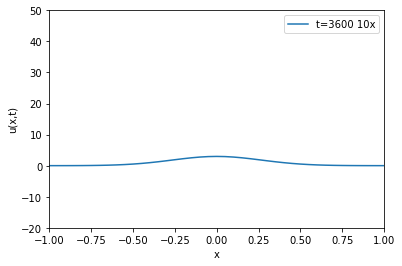

In [4]:
# Resolver la PDE con FE

import numpy as np
from math import pi, sqrt

np.set_printoptions(precision=4)

def I(x):
    """
    Condición inicial
    """
    return (1/(sqrt(2*pi)*sigma))*np.exp(-(x**2/(2*sigma**2)))

# Hay tantas ecuaciones u_i como puntos en la malla de X. 
# Pasamos el sistema de N+1 ecuaciones a un arreglo HRS donde cada entrada es una du_i dt

def rhs(u, t): # Este array es la f(U,t)
    N = len(u) - 1
    rhs = np.zeros(N+1) # Cada entrada es una ecuación del sistema: un escalar
    rhs[0] = (2*beta/dx**2)*(u[1] - u[0])
    for i in range(1,N):
        rhs[i] = (beta/dx**2)*(u[i+1] - 2*u[i] + u[i-1])
    rhs[N] = (2*beta/dx**2)*(u[N-1] - u[N])
    return rhs # Regresamos un array de escalares.

def diffusionGAUSS_RK4():
    global beta, dx, x, sigma  # needed in rhs
    beta = 0.00001
    sigma = 0.01
    N = 40 # Malla de 41 puntos
    x = np.linspace(-1, 1, N+1)
    dx = x[1] - x[0]
    u = np.zeros(N+1) # Array para la solución del sistema

    U_0 = np.zeros(N+1) # Array para condiciones iniciales
    U_0[:] = I(x)
    dt = 0.1
    # print(dt)
    T = 60*60 # Simulamos por 1 hora
    
    # Resolvemos usando FEu
    from ode_system_FE import ode_FE
    u, t = ode_FE(rhs, U_0, dt, T)
    
    # Make movie
    import os
    os.system('rm tmp_*.png') # Execute the command (a string) in a subshell.
    import matplotlib.pyplot as plt
    plt.ion() # Turn the Interactive mode ON.
    y = u[0,:] # Valores de x para t = 0
    lines = plt.plot(x, y) # Graficamos (x,solx) para t = 0 
    plt.axis([x[0], x[-1], I(-1)-20, I(1)+50])
    plt.xlabel('x')
    plt.ylabel('u(x,t)')
    counter = 0
    # Plot each of the first 100 frames, then increase speed by 10x
    change_speed = 10
    for i in range(0, u.shape[0]): # Iteramos sobre el número de divisions en el tiempo
        #print(t[i])
        plot = True if i <= change_speed else i % 10 == 0
        lines[0].set_ydata(u[i,:])
        # Asignamos etiquetas adecuadas para cada gráfica
        if i > change_speed:
            plt.legend(['t={:.0f} 10x'.format(t[i])])
        else:
            plt.legend(['t={:.0f}'.format(t[i])])
        # Las dibujamos
        plt.draw()
        if plot:
            plt.savefig('tmp_{:04d}.png'.format(counter))
            counter += 1
        #time.sleep(0.2)
    
    """
    print("u(x,t)    ", end="")
    for j in range(len(x)):
        print(f" x={x[j]} ", end="")
    print("")
    for i in range(int(round(T/dt)) + 1):
        print(f"u(x,{t[i]:1.1f}): {u[i]:} ")
        
    print("**************")
    
    print("time: ", t)
    
    print("u.shape[0]= ", u.shape[0])
    """
        
diffusionGAUSS_RK4()